In [1]:
import torch

In [2]:
# 직접 회귀 계수 구하기

In [3]:
x = torch.cat([torch.ones(100, 1), torch.randn(100, 5)], 1)
print(x)

tensor([[ 1.0000, -1.1572, -1.0845, -1.7828,  0.3565,  0.2672],
        [ 1.0000,  0.9213, -0.6774, -0.3983,  1.1189,  2.1574],
        [ 1.0000,  2.2444, -1.9307,  0.0765, -0.1496,  1.4623],
        [ 1.0000, -0.9813,  0.8498,  2.5386,  1.0391,  0.3734],
        [ 1.0000,  1.2761,  0.3411,  0.9033, -0.8418, -1.7071],
        [ 1.0000, -0.6629, -0.3486,  0.7401,  0.1764, -0.5760],
        [ 1.0000,  0.2704, -1.6995, -1.1728,  1.0925, -1.1667],
        [ 1.0000,  0.7881, -0.4468, -1.9288,  0.9339,  0.1695],
        [ 1.0000, -1.6719,  1.7491,  0.0393,  1.1453,  0.6650],
        [ 1.0000, -0.0783, -0.0635,  0.5962, -0.2701,  0.3108],
        [ 1.0000,  0.4636, -0.3621, -1.1986, -1.2572, -0.7836],
        [ 1.0000,  0.3297, -0.8777, -0.3349,  0.8884,  0.9263],
        [ 1.0000, -0.2402,  0.1800, -1.6446,  0.3138,  1.6526],
        [ 1.0000,  0.0929, -0.2375,  1.2742, -1.0490,  0.5946],
        [ 1.0000, -0.0471, -1.1769,  0.3438, -0.1228, -0.1983],
        [ 1.0000, -1.0277, -0.3794, -0.0

In [4]:
w_true = torch.Tensor([2, 3, 2, 4, 1, 3])
y = torch.mv(x, w_true) + torch.randn(100)*0.5

In [5]:
losses = []
gamma = 0.1
w = torch.randn(6, requires_grad=True) # initial seight
for e in range(100):
    w.grad = None
    y_pred = torch.mv(x, w)
    loss = torch.mean((y - y_pred) ** 2)
    loss.backward() # 미분
    w.data = w.data - gamma * w.grad.data # data만 바꿔야 됨
    losses.append(loss.item())

print('weight predicted:', w)
print('weight ture:', w_true)

weight predicted: tensor([1.9676, 3.0822, 1.9984, 3.9534, 0.9930, 3.0365], requires_grad=True)
weight ture: tensor([2., 3., 2., 4., 1., 3.])


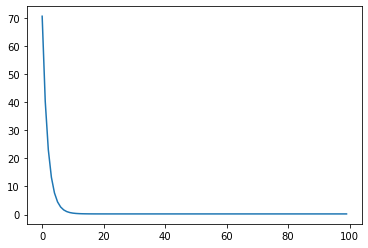

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [7]:
# use nn Module

In [8]:
from torch import nn, optim

In [9]:
net = nn.Linear(6, 1, bias=False)

obj = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [10]:
losses = []

for e in range(100):
    optimizer.zero_grad() # 초기화
    
    y_pred = net(x)
    loss = obj(y_pred.view(-1), y)
    loss.backward()
    optimizer.step() # 갱신
    
    losses.append(loss.item())
    
print('weight predicted:', net.weight.data)
print('weight ture:', w_true)

weight predicted: tensor([[1.6212, 2.8663, 1.6717, 3.6583, 0.9693, 2.6535]])
weight ture: tensor([2., 3., 2., 4., 1., 3.])


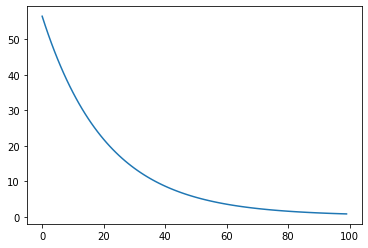

In [11]:
plt.plot(losses)